# Restricted Boltzmann Machine using quantum annealing on D-wave's QPU

## Imports

In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from qrbm.EncodedQRBM import QRBM

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import img_as_bool

import cv2 as cv

import random

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Presets

Here you can set hyperparameters for learning:

 - digits: list of digits to train on
 - THRESHOLD: how bright parts of image become 1 (darker become 0)
 - n_hidden: number of neurons in hidden layer
 - qpu: whether to use real D-wave's qpu (requires [setup](https://docs.ocean.dwavesys.com/en/stable/overview/sapi.html)) or a local simulator
 - epochs: number of epochs
 - lr: learning rate


In [2]:
n_hidden = 300
qpu = False
epochs = 300
lr = 0.1

## reading dataset

In [3]:
data = pd.read_csv('encoded_data.csv')

## prepare train and test set

In [4]:
cols = data.columns

In [5]:
cols = [x for x in cols if not x.startswith('Disease')]

In [6]:
cols = [x for x in cols if not '?' in x]

In [7]:
cols = [x for x in cols if not 'Treatment' in x]

In [8]:
cols

['Sex',
 'Stoke Risk (ABCD2 > 4)',
 'Dizziness Type',
 'SG Vertical N-None',
 'SG Vertical N-Down-beating_vs_Up-beating',
 'SG Horizintal N-None',
 'SG Horizintal N-Left-beating_vs_Right-beating',
 'SG Torsional N-None',
 'SG Torsional N-Top-pole-to-L-ear torsional_vs_Top-pole-to-R-ear torsional',
 'Right Gaze Vertical N',
 'Right G Horizintal N',
 'Right G Torsional N-None',
 'Right G Torsional N-Top-pole-to-L-ear torsional_vs_Top-pole-to-R-ear torsional',
 'Left Gaze "Induced" Vertical Nystagmus',
 'Left Gaze "Induced" Horizintal Nystagmus',
 'Left Gaze "Induced" Torsional Nystagmus-None',
 'Left Gaze "Induced" Torsional Nystagmus-Top-pole-to-L-ear torsional_vs_Top-pole-to-R-ear torsional',
 'Up Gaze "Induced" Vertical Nystagmus',
 'Up Gaze "Induced" Horizintal Nystagmus-None',
 'Up Gaze "Induced" Horizintal Nystagmus-Left-beating_vs_Right-beating',
 'Up Gaze "Induced" Torsional Nystagmus-None',
 'Up Gaze "Induced" Torsional Nystagmus-Top pole to right ear torsional nystamgus_vs_Top-

In [9]:
data = data[cols]

In [10]:
data[:10]

,Sex,Stoke Risk (ABCD2 > 4),Dizziness Type,SG Vertical N-None,SG Vertical N-Down-beating_vs_Up-beating,SG Horizintal N-None,SG Horizintal N-Left-beating_vs_Right-beating,SG Torsional N-None,SG Torsional N-Top-pole-to-L-ear torsional_vs_Top-pole-to-R-ear torsional,Right Gaze Vertical N,...,Alternate Cover (Moving from Left Eye Occluded to Right Eye Occluded) caused horizontal-L eye moves up (L hyper)_vs_R eye moves down (R hyper),Head impulse test to the left showed,Head impulse test to the right showed,Gait,Finger-nose-finger left hand-Abnormal,Finger-nose-finger left hand-None_vs_Normal,Finger-nose-finger right hand-Abnormal,Finger-nose-finger right hand-None_vs_Normal,Hearing loss right ear,Hearing loss left ear
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
6,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1
9,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,1,-1,1,1


In [11]:
data.shape

(95, 75)

In [12]:
indices = list(range(len(data)))
random.shuffle(indices)

In [13]:
len(indices)

95

In [14]:
num_train = int(len(data) * .9)
train = indices[:num_train]
test = indices[num_train:]
print(len(train), len(test))

85 10


In [15]:
X_train = data.values[train]
X_test = data.values[test]

In [16]:
X_train.shape

(85, 75)

## training

In [17]:
# import tracemalloc 
  
# tracemalloc.start() 

bm = QRBM(X_train[0], n_hidden=n_hidden, qpu=qpu)
bm.tqdm = tqdm

  0%|          | 0/300 [00:00<?, ?it/s]

0
71


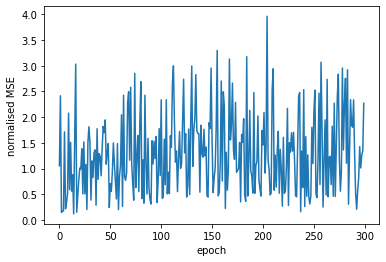

In [18]:
bm.train(X_train, epochs = 300, lr = lr, lr_decay = 0.1)

# snapshot = tracemalloc.take_snapshot() 
# top_stats = snapshot.statistics('lineno') 
  
# for stat in top_stats[:10]: 
#    print(stat)

cs:2, lr:0.5


  0%|          | 0/300 [00:00<?, ?it/s]

0
16


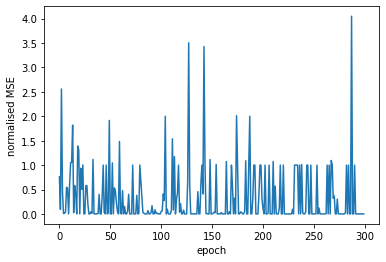

cs:2, lr:0.1


  0%|          | 0/300 [00:00<?, ?it/s]

0
56


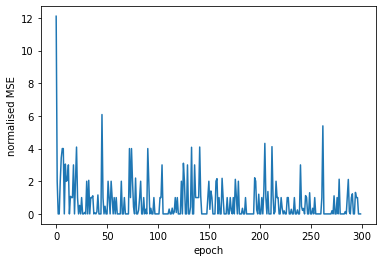

cs:2, lr:0.05


  0%|          | 0/300 [00:00<?, ?it/s]

0
70


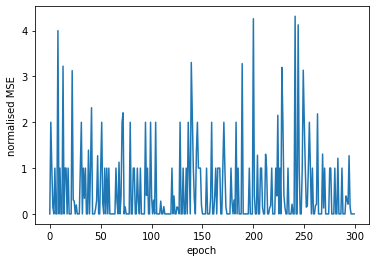

cs:2, lr:0.01


  0%|          | 0/300 [00:00<?, ?it/s]

0
50


KeyboardInterrupt: 

In [24]:
for cs in [2, 3, 4, 5, 6, 10]:
    for lr in [0.5, 0.1, 0.05, 0.01, 0.005]:
        print(f'cs:{cs}, lr:{lr}')
        bm.cs = cs
        bm.train(X_train, epochs = 300, lr = lr, epoch_drop=100)


In [ ]:
bm.hidden_bias

In [ ]:
bm.visible_bias

In [19]:
bm.save('test_model')

In [ ]:
bm.load('test_model')

# Load raw dat

In [20]:
from parsing_data import load_data, clean_data, load_config

config_file = 'config.json'
data_file = 'Simplified Dataset.xlsx'
sheet = 'Copy of Cases-Use'

config = load_config(config_file)
raw_data = load_data(data_file, sheet)
df = clean_data(raw_data, config)

Data has 95 rows and 54 columns.
Creating mask to determine which rows can be dropped
Currently 0 rows are being dropped
Checking for entries that are droppable by being rare...
0 rows are being dropped
Checking for unknown values that require warnings...
Checking for columns that lack signal...
Data has 95 rows and 54 columns.


In [21]:
df['Disease']

0     BPPV (PC) R
1     BPPV (PC) L
2     BPPV (PC) L
3     BPPV (PC) R
4     BPPV (PC) R
         ...     
90         Stroke
91         Stroke
92         Stroke
93         Stroke
94         Stroke
Name: Disease, Length: 95, dtype: object

## Encoder

In [22]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder

encoder = OrdinalEncoder().fit(df[['Disease']])

In [23]:
y = encoder.transform(df[['Disease']])

In [24]:
y_train = y.ravel()[train]
y_test = y.ravel()[test]

In [25]:
y_test

array([6., 4., 6., 4., 4., 4., 5., 0., 6., 4.])

# Train a multi-class classifier

## Compile the training data

In [26]:
X_test.shape

(10, 75)

In [27]:
X_train[0]

array([ 0,  0,  1,  1,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1, -1,  1,  0,
        0,  0,  1, -1,  1,  0,  0,  0,  1, -1,  1,  0,  0,  0,  1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1, -1,  0,  0,
        0,  1, -1,  1, -1,  1,  1])

In [30]:
len(bm.sample_hidden(X_train[0]))

300

In [37]:
a = bm.sample_hidden(X_train[0])
b = bm.sample_hidden(X_train[0])
a == b

True

In [39]:
encoded_train = np.array([bm.sample_hidden(x) for x in X_train])
encoded_test = np.array([bm.sample_hidden(x) for x in X_test])

In [41]:
encoded_train.shape

(85, 300)

In [42]:
y_train.shape

(85,)

## Train a model

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

clf = clf.fit(X_train, y_train)

for x, y in zip(X_test, y_test.tolist()):
#     clf.predict(x)
#     clf.predict_proba(x)
    print(clf.score(x.reshape(1, -1), np.array([[y]])))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0


In [54]:
encoder.inverse_transform(np.array([[6.]]))

array([['Vestibular Neuritis R']], dtype=object)

In [58]:
g = 0
b = 0
for x, y in zip(X_test, y_test.tolist()):
    x = x.reshape(1, -1)
    y = np.array([[y]])
    print(encoder.inverse_transform(y))
    pred_indx = clf.predict(x)
    y_est = pred_indx.reshape((1, 1))
    print(encoder.inverse_transform(y_est), pred_indx)
    if y == y_est:
        g += 1
    else:
        b += 1
    print(clf.predict_proba(x))
    print(clf.score(x, y))
    print('===')
print(g, b, g/(g+b))

[['Vestibular Neuritis R']]
[['Vestibular Neuritis R']] [6.]
[[0.02311655 0.02212796 0.00787394 0.00636714 0.07126834 0.01595393
  0.85329213]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[2.83961917e-04 4.14678324e-04 1.02885721e-03 3.97838899e-03
  9.94016880e-01 8.95867734e-05 1.87646868e-04]]
1.0
===
[['Vestibular Neuritis R']]
[['Vestibular Neuritis R']] [6.]
[[0.02188312 0.01611102 0.00594242 0.00617972 0.10826823 0.0151894
  0.82642608]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[7.75046278e-04 1.17963250e-03 5.46304073e-04 6.92185865e-04
  9.87372043e-01 8.86596945e-03 5.68818762e-04]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[1.98341210e-04 2.71313193e-04 1.69635006e-03 3.04096735e-03
  9.94404024e-01 1.89759809e-04 1.99244871e-04]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[0.0046927  0.00814194 0.01523446 0.02331391 0.94424137 0.00138518
  0.00299044]]
1.0
===
[['Vestibular Neuritis L']]
[['Vestibular Neuritis L']] [5.]
[[0.01699542 0.01440763 0.00220321 0.00165414 0.02457082 0.92644

In [57]:
g = 0
b = 0
for x, y in zip(X_train, y_train.tolist()):
    x = x.reshape(1, -1)
    y = np.array([[y]])
    print(encoder.inverse_transform(y))
    pred_indx = clf.predict(x)
    y_est = pred_indx.reshape((1, 1))
    print(encoder.inverse_transform(y_est), pred_indx)
    if y == y_est:
        g += 1
    else:
        b += 1
    print(clf.predict_proba(x))
    print(clf.score(x, y))
    print('===')
print(g, b, g/(g+b))

[['Stroke']]
[['Stroke']] [4.]
[[9.57100100e-05 1.25274666e-04 5.83775940e-04 2.66365645e-03
  9.96379139e-01 4.61484919e-05 1.06295633e-04]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[4.65595146e-04 8.50125247e-04 4.37752682e-03 5.53030142e-03
  9.88017682e-01 2.54799848e-04 5.03969140e-04]]
1.0
===
[['BPPV (PC) R']]
[['BPPV (PC) R']] [3.]
[[0.00653473 0.00356675 0.01635476 0.95902652 0.0106578  0.00103313
  0.0028263 ]]
1.0
===
[['Vestibular Neuritis L']]
[['Vestibular Neuritis L']] [5.]
[[0.00795338 0.0209903  0.00159172 0.00184103 0.04054244 0.91818399
  0.00889713]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[0.00100785 0.0015111  0.00494046 0.00789343 0.97676024 0.00223358
  0.00565334]]
1.0
===
[['BPPV (HC) R']]
[['BPPV (HC) R']] [1.]
[[0.31469077 0.58978346 0.01666231 0.01495517 0.02418069 0.01824202
  0.02148557]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[8.95254412e-04 1.35154566e-03 3.46871818e-03 5.42517164e-03
  9.85428696e-01 1.07738828e-03 2.35322544e-03]]
1.0
===
[['Vestibula

# All in one

Data has 95 rows and 54 columns.
Creating mask to determine which rows can be dropped
Currently 0 rows are being dropped
Checking for entries that are droppable by being rare...
0 rows are being dropped
Checking for unknown values that require warnings...
Checking for columns that lack signal...
Data has 95 rows and 54 columns.
76 19


  0%|          | 0/300 [00:00<?, ?it/s]

0
22


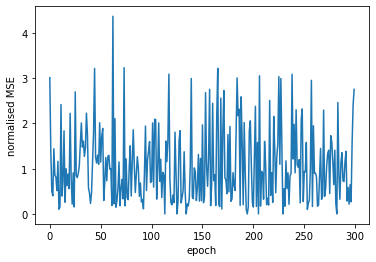

[['Stroke']]
[['Stroke']] [4.]
[[0.00266544 0.00325853 0.00133066 0.00174668 0.97071711 0.00268763
  0.01759396]]
1.0
===
[['Vestibular Neuritis L']]
[['Vestibular Neuritis L']] [5.]
[[0.00936807 0.02071577 0.00167018 0.00175113 0.0496383  0.90704115
  0.00981541]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[0.00225761 0.00217979 0.00610312 0.00923977 0.97393423 0.00179335
  0.00449213]]
1.0
===
[['BPPV (PC) R']]
[['BPPV (PC) R']] [3.]
[[0.04035456 0.07733418 0.03725975 0.73284455 0.0926109  0.00567762
  0.01391845]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[1.04188876e-03 1.20536956e-03 3.46476276e-04 4.19681744e-04
  9.93873522e-01 2.46436372e-03 6.48698193e-04]]
1.0
===
[['Vestibular Neuritis R']]
[['Vestibular Neuritis R']] [6.]
[[0.01735986 0.02058551 0.00636537 0.00499197 0.06411727 0.01359457
  0.87298546]]
1.0
===
[['Stroke']]
[['Stroke']] [4.]
[[2.59993616e-03 2.57869627e-03 4.21822521e-03 1.61766191e-02
  9.72949327e-01 3.98202073e-04 1.07899415e-03]]
1.0
===
[['Stroke']]
[['Stro

<Figure size 432x288 with 0 Axes>

In [60]:
%run model_training.py